**The Data Incubator**

**The Capstone Project: Part 1**

### **Companies' Growth Prediction Using Their LinkedIn and Facebook Account Metrics**
## By Shiva Esna Ashari
November 2021

# Summary
Growth is very critical to any company for different rreasons such as through growth a company can expand their product or services, attract new customers, obtain greater market share, hire good talents, ... Social media is an important tool for any company to improve their growth especially for online recruiting. LinmkedIn and Facebook are the most popular social media that is used by milions of people and can help companies to improve their growth. The goal of this project is to understand which of the LinkedIn and Facebook metrics contribute more to a company's growth.


A company's growth can be measured by the number of employees they have on LinkedIn. In this study, I want to find the correlation a company's growth has with other metrics such as the number of followers for their LinkedIn account, the date the company created their LinkedIn page, the last time, the frequency of, and the intervals between the times the company's LinkedIn page has been updated and the industry in which the company belongs.


In addition to the factors related to the company's LinkedIn page, I am trying to find out whether the company's Facebook page is correlated to the companies growth. I would like to study the relationship between the company's growth and the number of likes, checkins for the company's Facebook page, number of times people have been to the company's page, number of times the company has been talked about on Facebook, the date the company created their Facebook page, the last time, the frequency of, and the intervals between the times the company's Facebook page has been updated.


# Dataset
I used the "LinkedIn Profile Data Set" and "Facebook Followers Data Set" provided by Thinknum to The Data Incubator and downloaded the datasets from the following address:

https://www.thedataincubator.com/blog/2018/08/06/2018-data-sources-data-science-projects/


Since the datasets were big, I used Google Colab to handle such big datasets. I used !wget and unzip commands to load the data to Google Colab.


"LinkedIn Profile Data Set" is 953.7 MB with more than 2.4 million rows and 14 columns of data while "Facebook Followers Data Set" is 452.2 MB with more than 3.6 million rows and 14 columns.

LinkedIn dataset contains different features for more than 5000 companies such as number of employees and number of followers for each company on LinkedIn platform over time as well as the industry of each company. It also has the date that each company's LinkedIn page was added and the date the page has been updated.


Facebook dataset has the information about less than 5000 companies such as number of likes, number of times the comapny has been talked about on Facebook, number of checkins and were_here_count over time. It also has the date that each company's Facebook page was added and the date the page has been updated.


In [1]:
!wget "https://s3-us-west-2.amazonaws.com/documents.thinknum.com/dataset_dump/flikerqvnk/temp_datalab_records_linkedin_company.zip"


--2021-11-30 06:19:07--  https://s3-us-west-2.amazonaws.com/documents.thinknum.com/dataset_dump/flikerqvnk/temp_datalab_records_linkedin_company.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.205.56
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.205.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301331775 (287M) [binary/octet-stream]
Saving to: ‘temp_datalab_records_linkedin_company.zip’

temp_datalab_record 100%[===================>] 287.37M  33.4MB/s    in 8.8s    

2021-11-30 06:19:16 (32.5 MB/s) - ‘temp_datalab_records_linkedin_company.zip’ saved [301331775/301331775]



In [2]:
!unzip temp_datalab_records_linkedin_company.zip

Archive:  temp_datalab_records_linkedin_company.zip
  inflating: temp_datalab_records_linkedin_company.csv  


In [3]:
!wget "https://s3-us-west-2.amazonaws.com/documents.thinknum.com/dataset_dump/gnhsjbgeza/temp_datalab_records_social_facebook.zip"



--2021-11-30 06:19:26--  https://s3-us-west-2.amazonaws.com/documents.thinknum.com/dataset_dump/gnhsjbgeza/temp_datalab_records_social_facebook.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.225.80
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.225.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150397555 (143M) [binary/octet-stream]
Saving to: ‘temp_datalab_records_social_facebook.zip’

temp_datalab_record 100%[===================>] 143.43M  31.6MB/s    in 4.4s    

2021-11-30 06:19:30 (32.3 MB/s) - ‘temp_datalab_records_social_facebook.zip’ saved [150397555/150397555]



In [4]:
!unzip temp_datalab_records_social_facebook.zip

Archive:  temp_datalab_records_social_facebook.zip
  inflating: temp_datalab_records_social_facebook.csv  


# **Data Cleaning**

Using Python, data is studied and cleaned according to the following steps:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# LinkedIn Profile Data
This secion focuses on LinkedIn dataset:



In [6]:
# reading downloaded csv file into Panda's Dataframe
df_linkedin = pd.read_csv('temp_datalab_records_linkedin_company.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#@title Default title text
pd.set_option("display.max_columns", None)
df_linkedin.head

<bound method NDFrame.head of          dataset_id  as_of_date  \
0             58329  2015-09-14   
1             58329  2015-09-15   
2             58363  2015-09-16   
3             58366  2015-09-16   
4             58371  2015-09-16   
...             ...         ...   
2426191      902985  2018-07-17   
2426192      903052  2018-07-17   
2426193      902948  2018-07-17   
2426194      910210  2018-07-17   
2426195      897002  2018-07-17   

                                              company_name  followers_count  \
0                                            Goldman Sachs           552254   
1                                            Goldman Sachs           552862   
2                                      United Technologies            59157   
3                                             Novo Nordisk           336175   
4                                   Lowe's Companies, Inc.           134255   
...                                                    ...              ...

A DType warning is shown after reading the data. So first, I checked the DType of each column:

In [8]:
df_linkedin.dtypes

dataset_id                 int64
as_of_date                object
company_name              object
followers_count            int64
employees_on_platform      int64
link                      object
industry                  object
date_added                object
date_updated              object
description               object
website                   object
entity_id                float64
cusip                    float64
isin                     float64
dtype: object

DType of some of the date features are defined as Object and they need to be changed to the appropriae type. For column 9 & 10 the type is changed to String.

In [9]:
#read df & change Dtype for 2 columns with mixed types to strings
df_linkedin = pd.read_csv('temp_datalab_records_linkedin_company.csv',dtype={"description": "string","website":"string"})

In [10]:
#type casting of columns with date to datetime
date_cols = ['as_of_date','date_added', 'date_updated']

for c in date_cols:
    df_linkedin[c] = pd.to_datetime(df_linkedin[c])



In [11]:
#removing the time zone
df_linkedin['date_added'] = pd.to_datetime(df_linkedin.date_added).dt.tz_localize(None)
df_linkedin['date_updated'] = pd.to_datetime(df_linkedin.date_updated).dt.tz_localize(None)

In [12]:
df_linkedin.dtypes

dataset_id                        int64
as_of_date               datetime64[ns]
company_name                     object
followers_count                   int64
employees_on_platform             int64
link                             object
industry                         object
date_added               datetime64[ns]
date_updated             datetime64[ns]
description                      string
website                          string
entity_id                       float64
cusip                           float64
isin                            float64
dtype: object

**Dealing with missing values**

In [13]:
#Checking unique values in each column
df_linkedin.nunique()

dataset_id                  4610
as_of_date                  1033
company_name                5028
followers_count           326325
employees_on_platform     106744
link                        4610
industry                     140
date_added               1993101
date_updated             1993139
description                 5386
website                     3885
entity_id                      0
cusip                          0
isin                           0
dtype: int64

It is seen the last 3 columns only have NaN values so dropping these columns from the dataframe:

In [14]:
df_linkedin = df_linkedin.drop(['entity_id','cusip', 'isin'], axis=1)

Now, I check the percentage of missing values for each feature:

In [15]:
#finding percentage of NaN
df_linkedin.isna().mean().round(10)*100

dataset_id                0.000000
as_of_date                0.000000
company_name              0.000000
followers_count           0.000000
employees_on_platform     0.000000
link                      0.000000
industry                  1.494727
date_added                0.000000
date_updated              0.000000
description              75.232092
website                  79.794501
dtype: float64

We see that the percentage of missing values is low except for two columns of "description" and "website". So I kept them and I repleced them with "unknown".
<br>
Since, I need to have the industry of each company and only 1.49% of the companies don't have this information, I filled the missing values with "unknown":

In [16]:
df_linkedin['description'].fillna("unknown",inplace=True)
df_linkedin['website'].fillna("unknown",inplace=True)
df_linkedin['industry'].fillna("unknown",inplace=True)

Let's use Dill to save the data for future runs.

In [17]:
with open('linkedin_dataframe.dill','wb') as f:
    dill.dump(df_linkedin,f)

Here the saved df_linkedin can be opened:

In [18]:
with open('linkedin_dataframe.dill','rb') as f:
    df_linkedin = dill.load(f)

# **Explarotary Data Analysis for LinkedIn data set**
<br>
In this section, some information is obtained from the dataset. 

In [19]:
df_linkedin.describe(datetime_is_numeric=True)

,dataset_id,as_of_date,followers_count,employees_on_platform,date_added,date_updated
count,2.426196e+06,2426196,2.426196e+06,2.426196e+06,2426196,2426196
mean,7.347932e+05,2017-08-03 23:57:02.441966336,7.167738e+04,7.587255e+03,2017-07-31 06:31:39.004008704,2017-07-31 06:34:23.547822848
min,5.832900e+04,2015-09-14 00:00:00,0.000000e+00,0.000000e+00,2015-09-14 00:00:00,2015-09-14 00:00:00
25%,6.851400e+04,2017-03-09 00:00:00,2.148000e+03,2.180000e+02,2017-02-28 22:58:11.369329408,2017-02-28 22:58:11.965259776
50%,8.790880e+05,2017-09-08 00:00:00,9.335000e+03,1.083000e+03,2017-08-31 08:39:14.487790592,2017-08-31 08:39:14.487820032
75%,9.029690e+05,2018-02-06 00:00:00,3.864200e+04,4.513000e+03,2018-02-03 20:11:08.807544064,2018-02-03 20:11:09.023282944
max,2.339486e+06,2018-07-17 00:00:00,7.833967e+06,5.779520e+05,2018-07-17 20:33:35.649192,2018-07-17 20:33:35.649242
std,5.004440e+05,NaN,2.638344e+05,2.412444e+04,NaN,NaN


Based on the dataframe, we have a time series data and we can see the change of employees_on_platform number which represent the growth of the company over time. We can also see the number of followers over time and compare these two graphs.
<br>
I selected Qualcomm as the company to get some information for. 

In [20]:
df_linkedin_qualcomm = df_linkedin.loc[df_linkedin['company_name']=='Qualcomm']

In [21]:
df_linkedin_qualcomm.head

<bound method NDFrame.head of          dataset_id as_of_date company_name  followers_count  \
82            58393 2015-09-16     Qualcomm           219167   
271           58393 2015-09-17     Qualcomm           219301   
608           58393 2015-09-18     Qualcomm           219450   
1030          58393 2015-09-19     Qualcomm           219564   
1464          58393 2015-09-20     Qualcomm           219691   
...             ...        ...          ...              ...   
2408186       58393 2018-07-13     Qualcomm           359587   
2414218       58393 2018-07-14     Qualcomm           359641   
2415366       58393 2018-07-15     Qualcomm           359955   
2419013       58393 2018-07-16     Qualcomm           360122   
2425431       58393 2018-07-17     Qualcomm           360317   

         employees_on_platform                                   link  \
82                       27673  https://www.linkedin.com/company/2017   
271                      27685  https://www.linkedin.co

In order to have the same time window for both linkedin and Facebook datasets, the facebook time range is used.

In [22]:
#matching dates for both datasets
df_linkedin_qualcomm2 = df_linkedin_qualcomm.loc[(df_linkedin_qualcomm['as_of_date']>='2015-09-14') & (df_linkedin_qualcomm['as_of_date']<='2018-07-17')]


Setting the plot properties:

In [23]:
plt.rc('legend',**{'fontsize':20})
width=4

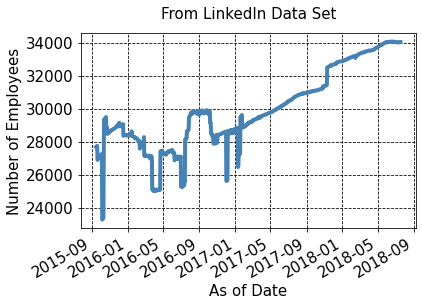

In [24]:
df_linkedin_qualcomm2.plot(x='as_of_date', y='employees_on_platform', legend=None, color='steelblue',linewidth=width)

plt.grid(color='black', linestyle='dashed')
plt.xlabel('As of Date', fontsize=15)
plt.ylabel('Number of Employees', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("From LinkedIn Data Set", fontsize=15, y=1.04)

plt.show()

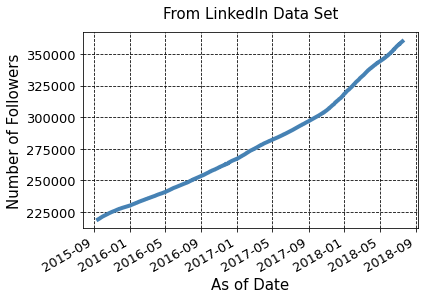

In [25]:
df_linkedin_qualcomm2.plot(x='as_of_date', y='followers_count', legend=None, color='steelblue',linewidth=width)

plt.grid(color='black', linestyle='dashed')
plt.xlabel('As of Date', fontsize=15)
plt.ylabel('Number of Followers', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.title("From LinkedIn Data Set", fontsize=15, y=1.04)

plt.show()

Let's check the correlation between the number of employees and the number of followers:

In [26]:
#checking correlation
correlation = df_linkedin_qualcomm["employees_on_platform"]. corr(df_linkedin_qualcomm['followers_count'])
print(correlation)

0.9064677255192071


There is a high correlation between the number of employees and the number of followers for Atlassian which could mean that we can use only one of these two features in our predictions. This needs to be checked for other companies as well to come up with a general decision.

**Checking industries of the companies on LinkedIn data set**

I'd like to look at the industry of each company next. So I group by the LinkedIn data and get the number of companies in each industry and the number of e,mployees in each industries.

In [27]:
x = (df_linkedin.groupby('industry').company_name.nunique())
x = pd.DataFrame(x)
print(x.shape)
x.columns = ['number of company']
#sorting based on the number of companies and dropping the unknown and getting the first 10 companies
x = x.sort_values('number of company', ascending=[False]).iloc[1:20]
print(x)

(141, 1)
                                     number of company
industry                                              
Biotechnology                                      337
Banking                                            335
Financial Services                                 303
Oil & Energy                                       234
Information Technology and Services                208
Computer Software                                  199
Pharmaceuticals                                    194
Retail                                             177
Real Estate                                        168
Internet                                           167
Telecommunications                                 141
Oil &amp; Energy                                   139
Medical Devices                                    127
Insurance                                          123
Electrical/Electronic Manufacturing                116
Semiconductors                                     108
A

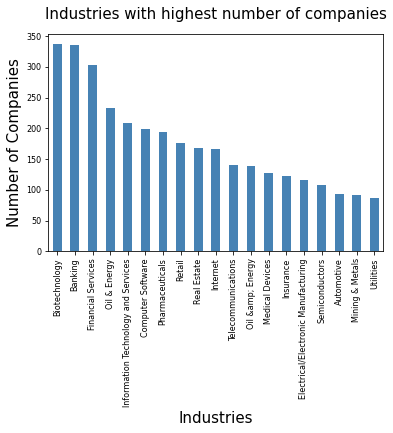

In [28]:
x.plot.bar(legend=None, color='steelblue',linewidth=width)
plt.xlabel('Industries', fontsize=15)
plt.ylabel('Number of Companies', fontsize=15)
plt.title("Industries with highest number of companies", fontsize=15, y=1.04)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

Checking the number of employees in each industry as of the last date of 2018-07-17:

In [29]:
xx = df_linkedin.groupby('industry')
new_x = xx.apply(lambda x:x[x['as_of_date'] == '2018-07-17 00:00:00']['employees_on_platform'].sum())
new_x = pd.DataFrame(new_x)
print(new_x.shape)
type(new_x)
new_x.columns = ['number of employees']
new_x = new_x.sort_values('number of employees', ascending=[False]).iloc[1:20]
print(new_x)

(141, 1)
                                     number of employees
industry                                                
Financial Services                               2441840
Retail                                           2102165
Banking                                          1499553
Telecommunications                               1444802
Oil & Energy                                     1037055
Internet                                          877304
Pharmaceuticals                                   861517
Electrical/Electronic Manufacturing               849471
Hospital & Health Care                            810136
Automotive                                        762706
Computer Software                                 653439
Consumer Goods                                    561298
Restaurants                                       543585
Insurance                                         468064
Hospitality                                       422420
Semiconductors        

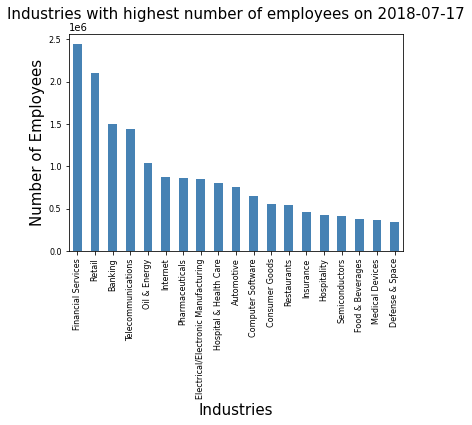

In [30]:
new_x.plot.bar(legend=None, color='steelblue',linewidth=width)
plt.xlabel('Industries', fontsize=15)
plt.ylabel('Number of Employees', fontsize=15)
plt.title("Industries with highest number of employees on 2018-07-17", fontsize=15, y=1.04)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

It can be seen that there are many companies in Biotechnology indusrtry but the number of employees in Biotechnology industry is not between the top 20 industries. It means that there are many small companies in this field.

Let's now focus on the second dataset we have.

# Facebook Followers Data
This secion focuses on Facebook dataset:

In [31]:
# reading downloaded csv file into Panda's Dataframe
df_facebook = pd.read_csv('temp_datalab_records_social_facebook.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
pd.set_option("display.max_columns", None)
df_facebook.head

<bound method NDFrame.head of          dataset_id                    time              username  checkins  \
0             53088  2015-01-01 05:00:00+00            SodaStream         0   
1             52642  2015-01-01 05:00:00+00              ANSYSInc       148   
2             53656  2015-01-01 05:00:00+00         MyAquaAmerica         0   
3             53033  2015-01-01 05:00:00+00              Qualcomm       173   
4             52783  2015-01-01 05:00:00+00  eaglepharmaceuticals         0   
...             ...                     ...                   ...       ...   
3621386     1333153  2018-07-17 04:00:00+00  SignatureStyleSalons         0   
3621387      911424  2018-07-17 04:00:00+00                tdr.jp    510211   
3621388       64854  2018-07-17 04:00:00+00              fiberone         0   
3621389       57960  2018-07-17 04:00:00+00                PayPal         0   
3621390      997461  2018-07-17 04:00:00+00      TorchlightEnergy         0   

        has_added_app

A DType warning is shown after reading the data. So first, I checked the DType of each column:

In [33]:
df_facebook.dtypes

dataset_id               int64
time                    object
username                object
checkins                 int64
has_added_app           object
were_here_count          int64
likes                    int64
talking_about_count      int64
facebook_id              int64
date_added              object
date_updated            object
entity_id              float64
cusip                  float64
isin                   float64
dtype: object

DType of some of the date features are defined as Object and they need to be changed to the appropriae type. 

In [34]:
#type casting of columns with date to datetime
date_cols = ['time','date_added', 'date_updated']

for c in date_cols:
    df_facebook[c] = pd.to_datetime(df_facebook[c])

In [35]:
#removing the time zone
df_facebook['time'] = pd.to_datetime(df_facebook.time).dt.tz_localize(None)
df_facebook['date_added'] = pd.to_datetime(df_facebook.date_added).dt.tz_localize(None)
df_facebook['date_updated'] = pd.to_datetime(df_facebook.date_updated).dt.tz_localize(None)

In [36]:
df_facebook.dtypes

dataset_id                      int64
time                   datetime64[ns]
username                       object
checkins                        int64
has_added_app                  object
were_here_count                 int64
likes                           int64
talking_about_count             int64
facebook_id                     int64
date_added             datetime64[ns]
date_updated           datetime64[ns]
entity_id                     float64
cusip                         float64
isin                          float64
dtype: object

**Dealing with missing values**

In [37]:
#Checking unique values in each column
df_facebook.nunique()

dataset_id                4714
time                      1241
username                  4950
checkins                117065
has_added_app                1
were_here_count         244669
likes                   926145
talking_about_count     134589
facebook_id               4714
date_added             2090860
date_updated           3611781
entity_id                    0
cusip                        0
isin                         0
dtype: int64

It is seen the last 3 columns only have NaN values so dropping these columns from the dataframe now. Also "has_added_app" has only 1 unique value so we can drop this one as well.

In [38]:
df_facebook = df_facebook.drop(['has_added_app','entity_id','cusip', 'isin'], axis=1)

Now, I check the percentage of missing values for each feature:

In [39]:
#finding percentage of NaN
df_facebook.isna().mean().round(10)*100

dataset_id              0.000000
time                    0.000000
username                3.339297
checkins                0.000000
were_here_count         0.000000
likes                   0.000000
talking_about_count     0.000000
facebook_id             0.000000
date_added             42.035919
date_updated            0.037665
dtype: float64

Removing the rows that don't have a username:

In [40]:
df_facebook=df_facebook[df_facebook['username'].notna()]

In [41]:
#finding percentage of NaN
df_facebook.isna().mean().round(10)*100

dataset_id              0.000000
time                    0.000000
username                0.000000
checkins                0.000000
were_here_count         0.000000
likes                   0.000000
talking_about_count     0.000000
facebook_id             0.000000
date_added             42.039936
date_updated            0.038966
dtype: float64

Let's use Dill to save the dataframe

In [42]:
with open('facebook_dataframe.dill','wb') as f:
    dill.dump(df_facebook,f)

Having the saved df_facebook reopened:

In [43]:
with open('facebook_dataframe.dill','rb') as f:
    df_facebook = dill.load(f)

# **Explarotary Data Analysis for Facebook data set**
<br>
In this section, some information is obtained from each datasets. 

In [44]:
df_facebook.describe(datetime_is_numeric=True)

,dataset_id,time,checkins,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated
count,3.500462e+06,3500462,3.500462e+06,3.500462e+06,3.500462e+06,3.500462e+06,3.500462e+06,2028870,3499098
mean,2.685888e+05,2017-03-13 06:10:02.664610304,1.459108e+04,1.398283e+05,8.439430e+05,1.036674e+04,1.680695e+14,2017-10-10 23:05:26.081698560,2017-07-02 15:50:04.338967040
min,5.261200e+04,2015-01-01 05:00:00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.181544e+09,2017-02-08 18:51:39.829967,2017-02-14 01:53:14.280741
25%,5.357400e+04,2016-08-07 04:00:00,0.000000e+00,0.000000e+00,2.810000e+03,3.100000e+01,9.220426e+10,2017-06-13 16:38:34.389139456,2017-02-14 05:17:30.613056256
50%,6.330900e+04,2017-04-18 04:00:00,1.300000e+01,0.000000e+00,2.347800e+04,2.780000e+02,1.113497e+14,2017-10-12 01:38:30.673601024,2017-04-18 14:32:06.959675904
75%,8.637800e+04,2017-11-12 05:00:00,3.010000e+02,1.280000e+02,2.314898e+05,2.648000e+03,1.906672e+14,2018-02-06 09:09:32.757852160,2017-11-15 17:51:03.489232128
max,2.340089e+06,2018-07-17 04:00:00,1.729055e+07,3.682637e+07,2.106411e+08,5.747010e+06,1.015013e+16,2018-07-18 05:49:36.606543,2018-07-18 05:49:36.606580
std,3.864625e+05,NaN,2.365935e+05,1.348850e+06,5.019451e+06,7.414411e+04,3.994996e+14,NaN,NaN


Based on the dataframe, we have a time series data and we can see the change of "likes" of the company over "time" as well as "talking_about_count" versus "time".
<br>
I selected Qualcomm as the company to get some information for.

In [45]:
df_facebook_qualcomm = df_facebook.loc[df_facebook['username']=='Qualcomm']

In [46]:
df_facebook_qualcomm.head

<bound method NDFrame.head of          dataset_id                time  username  checkins  were_here_count  \
3             53033 2015-01-01 05:00:00  Qualcomm       173                0   
483           53033 2015-01-03 05:00:00  Qualcomm       173                0   
1168          53033 2015-01-04 05:00:00  Qualcomm       173                0   
1847          53033 2015-01-06 05:00:00  Qualcomm       173                0   
2199          53033 2015-01-07 05:00:00  Qualcomm       173                0   
...             ...                 ...       ...       ...              ...   
3602028       53033 2018-06-25 04:00:00  Qualcomm       150                0   
3606188       53033 2018-07-05 04:00:00  Qualcomm       150                0   
3609450       53033 2018-07-11 04:00:00  Qualcomm       150                0   
3615759       53033 2018-07-14 04:00:00  Qualcomm       150                0   
3617575       53033 2018-07-16 04:00:00  Qualcomm       150                0   

         

In [47]:
#matching dates for both datasets
df_facebook_qualcomm2 = df_facebook_qualcomm.loc[(df_facebook_qualcomm['time']>='2015-09-14') & (df_facebook_qualcomm['time']<='2018-07-17')]

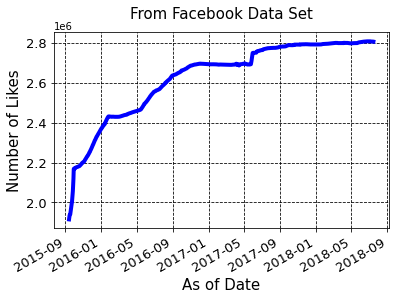

In [48]:
df_facebook_qualcomm2.plot(x='time', y='likes', legend=None, color='blue',linewidth=width)

plt.grid(color='black', linestyle='dashed')
plt.xlabel('As of Date', fontsize=15)
plt.ylabel('Number of Likes', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.title("From Facebook Data Set", fontsize=15, y=1.04)

plt.show()

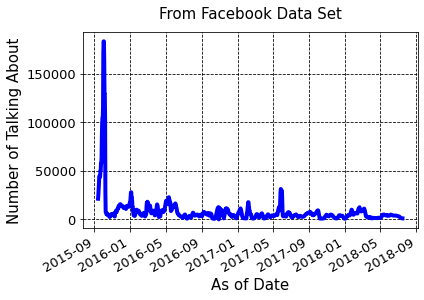

In [49]:
df_facebook_qualcomm2.plot(x='time', y='talking_about_count', legend=None, color='blue',linewidth=width)

plt.grid(color='black', linestyle='dashed')
plt.xlabel('As of Date', fontsize=15)
plt.ylabel('Number of Talking About', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.title("From Facebook Data Set", fontsize=15, y=1.04)

plt.show()

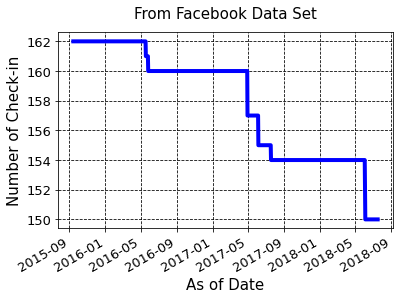

In [50]:
df_facebook_qualcomm2.plot(x='time', y='checkins', legend=None, color='blue',linewidth=width)

plt.grid(color='black', linestyle='dashed')
plt.xlabel('As of Date', fontsize=15)
plt.ylabel('Number of Check-in', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.title("From Facebook Data Set", fontsize=15, y=1.04)

plt.show()

In [51]:
#checking correlation
correlation1 = df_facebook_qualcomm["likes"]. corr(df_facebook_qualcomm['talking_about_count'])
print(correlation1)



correlation2 = df_facebook_qualcomm["checkins"]. corr(df_facebook_qualcomm['talking_about_count'])
print(correlation2)

-0.538043112803269
0.5119895526345035


It can be seen that "likes" & "talking_about_count" has a negative correlation and it means that when one is increasing the other one is decreasing. However, "checkins" & "talking_about_count" are 50% correlated to each other. So we can keep both features.

# Comparing LinkedIn Profiles Data set with Facebook Followers Data set

By looking at the LinkedIn Profiles & Facebook Followers for Qualcomm, it is obvious that dataset_id is not the same on these two datasets and the only way to relate these datasets to each other is by using the name of the company. In summary, "company_name" on the LinkedIn Profile dataset is "username" on Facebook dataset.

We can look for other companie in both datasets and find the associated data. I looked for any companies that has the word "Gold" in its name and I found a few companies in the LinkedIn set but none in the Facebook dataset. Therefore, if we want to relate these two datasets to each other, we need to find the companies' names that are in common between these two datasets and then we can aggregate their information from both datasets.

In [52]:
df_linkedin[df_linkedin['company_name'].str.contains("Gold")]

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00.000000,2015-09-14 00:00:00.000000,unknown,unknown
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00.000000,2015-09-15 00:00:00.000000,unknown,unknown
65,58329,2015-09-16,Goldman Sachs,553592,38145,https://www.linkedin.com/company/1382,Investment Banking,2015-09-16 00:00:00.000000,2015-09-16 00:00:00.000000,unknown,unknown
280,58329,2015-09-17,Goldman Sachs,554209,38143,https://www.linkedin.com/company/1382,Investment Banking,2015-09-17 00:00:00.000000,2015-09-17 00:00:00.000000,unknown,unknown
613,58329,2015-09-18,Goldman Sachs,554988,38130,https://www.linkedin.com/company/1382,Investment Banking,2015-09-18 00:00:00.000000,2015-09-18 00:00:00.000000,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...
2424967,2253358,2018-07-17,AngloGold Ashanti,158838,8869,https://www.linkedin.com/company/15560,Mining & Metals,2018-07-17 18:07:50.586352,2018-07-17 18:07:50.586379,unknown,http://www.anglogoldashanti.com
2425700,58329,2018-07-17,Goldman Sachs,1030580,53569,https://www.linkedin.com/company/1382,Financial Services,2018-07-17 18:58:41.245476,2018-07-17 18:58:41.245502,unknown,http://www.goldmansachs.com
2425893,869193,2018-07-17,Royal Gold Inc.,813,49,https://www.linkedin.com/company/366760,Mining & Metals,2018-07-17 17:11:39.521314,2018-07-17 17:11:39.521340,unknown,http://www.royalgold.com
2425918,59065,2018-07-17,Barrick Gold Corporation,273881,9584,https://www.linkedin.com/company/11876,Mining & Metals,2018-07-17 17:57:45.565881,2018-07-17 17:57:45.565920,unknown,http://www.barrick.com


In [53]:
# No company name that contains 'Gold' was found in the Facebook dataset
df_facebook.loc[df_facebook['username'].str.contains("Gold")]

,dataset_id,time,username,checkins,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated
202,53385,2015-01-01 05:00:00,Goldcorp,70,70,5157,123,124946056577,NaT,2017-02-14 05:29:05.407058
423,53231,2015-01-01 05:00:00,AuRicoGold,0,0,128,0,442369195872354,NaT,2017-02-14 04:05:46.049122
887,53385,2015-01-03 05:00:00,Goldcorp,70,70,5165,133,124946056577,NaT,2017-02-14 05:29:05.420049
901,53231,2015-01-03 05:00:00,AuRicoGold,0,0,129,1,442369195872354,NaT,2017-02-14 04:05:46.067046
971,53231,2015-01-04 05:00:00,AuRicoGold,0,0,130,1,442369195872354,NaT,2017-02-14 04:05:46.081950
...,...,...,...,...,...,...,...,...,...,...
3620258,869373,2018-07-17 04:00:00,YamanaGoldInc,0,0,5715,47,150944298311295,2018-07-18 05:44:22.989973,2018-07-18 05:44:22.990007
3620552,69161,2018-07-17 04:00:00,KinrossGold,273,0,37629,31,164891496883427,2018-07-18 05:46:45.775147,2018-07-18 05:46:45.775184
3620623,60657,2018-07-17 04:00:00,GoldfishSmiles,0,0,646025,367,132414976862076,2018-07-17 05:29:43.087212,2018-07-17 05:29:43.087252
3620875,871220,2018-07-17 04:00:00,EldoradoGoldCorp,31,0,2097,20,579022898816906,2018-07-18 05:45:33.378944,2018-07-18 05:45:33.378982


For Qualcomm, we can see how the number of "likes" is correlated with the number of employees

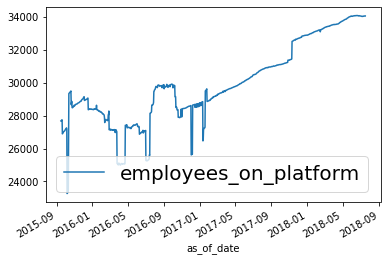

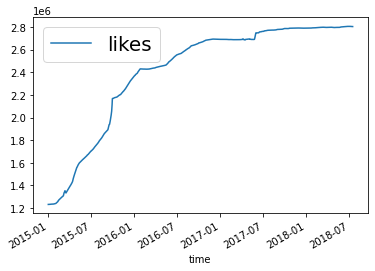

In [54]:
df_linkedin_qualcomm.plot(x='as_of_date', y='employees_on_platform')
df_facebook_qualcomm.plot(x='time', y='likes')

By comparing these two graphs, it is seen that as the number of likes increased, number of employees also increase which makes sense because it shows that as the company has become more popular, the number of employees has increased or vice versa. Or as the number of employees has increased, more employees have liked the company page on Facebook.

## Finding the List of Unique Comapny names in LinkedIn & Facebook 
In this section, I want to see which companies are present in both data sets.

In [ ]:
df_linkedin_unique = pd.DataFrame(df_linkedin['company_name'].str.lower().unique(), columns=['company_name'])
df_linkedin_unique = pd.DataFrame(df_linkedin_unique['company_name'].map(lambda x: x.rstrip('\'\, inc.')))
df_linkedin_unique.columns=['company_name']
type(df_linkedin_unique)

pandas.core.frame.DataFrame

In [ ]:
df_linkedin_unique

,company_name
0,goldman sachs
1,united technologies
2,novo nordisk
3,lowe's companies
4,unitedhealth group
...,...
5001,brf
5002,coca-cola andina
5003,playa hotels & resorts
5004,compañía de minas buenaventura s.a.a


In [ ]:
df_facebook_unique = pd.DataFrame(df_facebook['username'].str.lower().unique(), columns=['username'])
df_facebook_unique = pd.DataFrame(df_facebook_unique['username'].map(lambda x: x.rstrip('\'\, inc.')))
df_facebook_unique.columns=['username']
type(df_facebook_unique)

pandas.core.frame.DataFrame

In [ ]:
df_facebook_unique

,username
0,sodastream
1,ansys
2,myaquaamerica
3,qualcomm
4,eaglepharmaceuticals
...,...
4886,leeriders
4887,interglobetechnologies
4888,discoverycove
4889,cbssportingclub


In [ ]:
df_merged_inner = pd.merge(left=df_linkedin_unique, right=df_facebook_unique, left_on='company_name', right_on='username')

In [ ]:
pd.set_option('display.max_rows', df_merged_inner.shape[0]+1)
df_merged_inner.sort_values('company_name')

,company_name,username
8,3m,3m
282,8x8,8x8
273,abaxis,abaxis
439,abb,abb
192,abbott,abbott
211,abiomed,abiomed
28,accenture,accenture
25,activisio,activisio
43,adobe,adobe
204,adt,adt


In [ ]:
df_facebook_unique.loc[df_facebook_unique['username'].str.contains("bt")]

,username
636,bbtbank
781,btuk
1023,lendingclubteam
1938,pbtee
2363,bt
2439,kalbtv
3315,mjbtr
3791,cbtcconnects
3927,btdmfg
4152,communitybt


In [ ]:
df_linkedin_unique.loc[df_linkedin_unique['company_name'].str.contains("corning")]

,company_name
245,corning incorporated
1024,owens corning
3639,dow corning


In [ ]:
df_merged_inner.loc[df_merged_inner['company_name'].str.contains("corning")]

,company_name,username


## Joining the two data sets
By using inner join, we merge the two data sets based on the name of the companies.

In [ ]:
df_merged_inner = pd.merge(left=df_linkedin, right=df_facebook, left_on='company_name', right_on='username')

# Calculating companies' growth from 2017-7-01 to 2018-07-01

For this section the growth percentage of companies between two dates of 2017-7-01 and 2018-07-01 is calculated using LinkedIn data set.

In [55]:
#getting comapnies' which have the data on 2017-07-01
df_linkedin_begin = df_linkedin.loc[(df_linkedin['as_of_date']=='2017-07-01')]
df_linkedin_begin.shape
# df_linkedin_begin.head

(3399, 11)

In [56]:
#getting comapnies' which have the data on 2018-07-01
df_linkedin_end = df_linkedin.loc[(df_linkedin['as_of_date']=='2018-07-01')]
df_linkedin_end.shape

(3742, 11)

In [57]:
df_linkedin_begin_end = pd.merge(df_linkedin_begin, df_linkedin_end, on=['company_name'])
df_linkedin_begin_end.nunique()
df_linkedin_begin_end.head()

,dataset_id_x,as_of_date_x,company_name,followers_count_x,employees_on_platform_x,link_x,industry_x,date_added_x,date_updated_x,description_x,website_x,dataset_id_y,as_of_date_y,followers_count_y,employees_on_platform_y,link_y,industry_y,date_added_y,date_updated_y,description_y,website_y
0,59196,2017-07-01,PHI Inc,7024,1011,https://www.linkedin.com/company/238999,Airlines/Aviation,2017-07-01 10:04:41.995973,2017-07-01 10:04:41.996022,"PHI, Inc. is one of the world’s leading helico...",unknown,59196,2018-07-01,7766,1120,https://www.linkedin.com/company/238999,Airlines/Aviation,2018-07-01 21:09:35.984772,2018-07-01 21:09:35.984799,unknown,http://www.phihelico.com
1,870495,2017-07-01,WPX Energy,14017,759,https://www.linkedin.com/company/2599361,Oil & Energy,2017-07-01 10:23:28.870049,2017-07-01 10:23:28.870097,Key to the company’s plans are three core reso...,unknown,870495,2018-07-01,22564,781,https://www.linkedin.com/company/2599361,Oil & Energy,2018-07-01 23:36:28.554223,2018-07-01 23:36:28.554263,unknown,http://www.wpxenergy.com
2,870629,2017-07-01,Bruker,7028,304,https://www.linkedin.com/company/5174388,Electrical/Electronic Manufacturing,2017-07-01 09:52:12.150623,2017-07-01 09:52:12.150676,"Right from the beginning, which is now more th...",unknown,870629,2018-07-01,11970,2459,https://www.linkedin.com/company/5174388,Electrical/Electronic Manufacturing,2018-07-01 19:04:35.100377,2018-07-01 19:04:35.100426,unknown,http://www.bruker.com
3,902986,2017-07-01,LaCie,2735,158,https://www.linkedin.com/company/9274,Computer Hardware,2017-07-01 10:07:20.234993,2017-07-01 10:07:20.235040,"LaCie, the premium brand of Seagate technology...",unknown,902986,2018-07-01,3063,170,https://www.linkedin.com/company/9274,Computer Hardware,2018-07-01 21:17:40.913691,2018-07-01 21:17:40.913716,unknown,http://www.lacie.com
4,870631,2017-07-01,Cypress Semiconductor Corporation,44901,3758,https://www.linkedin.com/company/3579,Semiconductors,2017-07-01 09:55:39.219286,2017-07-01 09:55:39.219340,Cypress (NASDAQ: CY) – We live for problems. T...,unknown,870631,2018-07-01,56801,4122,https://www.linkedin.com/company/3579,Semiconductors,2018-07-01 19:10:43.699220,2018-07-01 19:10:43.699271,unknown,http://www.cypress.com


In [58]:
#getting the percentage of company growth over time window
df_linkedin_begin_end['growth_perc'] = (df_linkedin_begin_end['employees_on_platform_y']-df_linkedin_begin_end['employees_on_platform_x'])/df_linkedin_begin_end['employees_on_platform_x']
print(df_linkedin_begin_end[['company_name','growth_perc']])
df_linkedin_begin_end.shape

                           company_name  growth_perc
0                               PHI Inc     0.107814
1                            WPX Energy     0.028986
2                                Bruker     7.088816
3                                 LaCie     0.075949
4     Cypress Semiconductor Corporation     0.096860
...                                 ...          ...
3246                        CyberSource     0.059603
3247                        TransCanada     0.135801
3248                               BBVA     1.595159
3249      Western World Insurance Group     0.094340
3250          Validus Reinsurance, Ltd.     0.005128

[3251 rows x 2 columns]


(3251, 22)

We can see check how many companies had negative growth and how many had positive growth:

In [59]:
df_linkedin_begin_end_neg = df_linkedin_begin_end.loc[(df_linkedin_begin_end['growth_perc']<0)]
df_linkedin_begin_end_neg.shape

(368, 22)

In [60]:
df_linkedin_begin_end_zero = df_linkedin_begin_end.loc[(df_linkedin_begin_end['growth_perc'] == 0.0)]
df_linkedin_begin_end_zero.shape

(56, 22)

11.3% of the companies have negative growth and 1.7% of the companies have zero growth.


Next the company with maximum growth is studied:

In [61]:
#getting the company with maximum growth
df_linkedin_begin_end.loc[df_linkedin_begin_end['growth_perc'] == df_linkedin_begin_end['growth_perc'].max()]

,dataset_id_x,as_of_date_x,company_name,followers_count_x,employees_on_platform_x,link_x,industry_x,date_added_x,date_updated_x,description_x,website_x,dataset_id_y,as_of_date_y,followers_count_y,employees_on_platform_y,link_y,industry_y,date_added_y,date_updated_y,description_y,website_y,growth_perc
1729,868113,2017-07-01,21st Century Fox,9011,508,https://www.linkedin.com/company/3146632,Media Production,2017-07-01 09:59:06.561607,2017-07-01 09:59:06.561659,We reach and engage nearly 1.8 billion people ...,unknown,868113,2018-07-01,12179,29972,https://www.linkedin.com/company/3146632,Media Production,2018-07-01 19:16:13.432245,2018-07-01 19:16:13.432273,unknown,http://www.21cf.com/careers,58.0


In [62]:
df_linkedin.loc[(df_linkedin['company_name']=='21st Century Fox') & (df_linkedin['employees_on_platform']==393)]

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website
315866,868113,2016-11-08,21st Century Fox,7784,393,https://www.linkedin.com/company/3146632,Media Production,2016-11-08,2016-11-08,unknown,unknown
317384,868113,2016-11-09,21st Century Fox,7786,393,https://www.linkedin.com/company/3146632,Media Production,2016-11-09,2016-11-09,unknown,unknown
318904,868113,2016-11-10,21st Century Fox,7792,393,https://www.linkedin.com/company/3146632,Media Production,2016-11-10,2016-11-10,unknown,unknown
320429,868113,2016-11-11,21st Century Fox,7795,393,https://www.linkedin.com/company/3146632,Media Production,2016-11-11,2016-11-11,unknown,unknown
328063,868113,2016-11-16,21st Century Fox,7822,393,https://www.linkedin.com/company/3146632,Media Production,2016-11-16,2016-11-16,unknown,unknown
329591,868113,2016-11-17,21st Century Fox,7823,393,https://www.linkedin.com/company/3146632,Media Production,2016-11-17,2016-11-17,unknown,unknown


In [63]:
df_linkedin.loc[(df_linkedin['company_name']=='21st Century Fox')]

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website
208398,868113,2016-08-19,21st Century Fox,7363,16344,https://www.linkedin.com/company/3146632,Media Production,2016-08-19 00:00:00.000000,2016-08-19 00:00:00.000000,unknown,unknown
209267,868113,2016-08-20,21st Century Fox,7365,16348,https://www.linkedin.com/company/3146632,Media Production,2016-08-20 00:00:00.000000,2016-08-20 00:00:00.000000,unknown,unknown
210021,868113,2016-08-21,21st Century Fox,7366,16360,https://www.linkedin.com/company/3146632,Media Production,2016-08-21 00:00:00.000000,2016-08-21 00:00:00.000000,unknown,unknown
210782,868113,2016-08-22,21st Century Fox,7367,16369,https://www.linkedin.com/company/3146632,Media Production,2016-08-22 00:00:00.000000,2016-08-22 00:00:00.000000,unknown,unknown
211416,868113,2016-08-23,21st Century Fox,7379,16338,https://www.linkedin.com/company/3146632,Media Production,2016-08-23 00:00:00.000000,2016-08-23 00:00:00.000000,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...
2409243,868113,2018-07-13,21st Century Fox,12346,30145,https://www.linkedin.com/company/3146632,Media Production,2018-07-13 18:19:50.712828,2018-07-13 18:19:50.712877,unknown,http://www.21cf.com/careers
2413108,868113,2018-07-14,21st Century Fox,12348,30145,https://www.linkedin.com/company/3146632,Media Production,2018-07-14 02:23:11.554676,2018-07-14 02:23:11.554725,unknown,http://www.21cf.com/careers
2415702,868113,2018-07-15,21st Century Fox,12365,30156,https://www.linkedin.com/company/3146632,Media Production,2018-07-15 21:14:06.891808,2018-07-15 21:14:06.891851,unknown,http://www.21cf.com/careers
2419912,868113,2018-07-16,21st Century Fox,12381,30168,https://www.linkedin.com/company/3146632,Media Production,2018-07-16 18:18:55.210223,2018-07-16 18:18:55.210249,unknown,http://www.21cf.com/careers


By inspecting the data for 21st Century Fox, it is obvious that the sudden increase in the number of employees doesn't look real and this could be an outlier data point for us. So we need to look at the percentiles of the growth percentage.

In [64]:
df_linkedin_begin_end['growth_perc'].describe()


count    3249.000000
mean        0.376902
std         2.175192
min        -1.000000
25%         0.053571
50%         0.120383
75%         0.230769
max        58.000000
Name: growth_perc, dtype: float64

In [65]:
df_linkedin_begin_end['growth_perc'].quantile([0.25,0.5,0.75])

0.25    0.053571
0.50    0.120383
0.75    0.230769
Name: growth_perc, dtype: float64

By comparing the median, 25% and 75% percentile, we can see that maximum of 58% growth is an outlier. As a result, the data points between std-3*mean and std+3mean are removed

In [66]:
#removing outliers
lower = 0.376902 - 2.175192 * 3
upper = 0.376902 + 2.175192 * 3

df_linkedin_begin_end_clean = df_linkedin_begin_end.loc[(df_linkedin_begin_end['growth_perc']>= lower) & (df_linkedin_begin_end['growth_perc']<= upper)]
df_linkedin_begin_end_clean['growth_perc'].describe()

count    3227.000000
mean        0.236153
std         0.545860
min        -1.000000
25%         0.053218
50%         0.119868
75%         0.225760
max         6.608451
Name: growth_perc, dtype: float64

It is obvious that now the mean is much closeer to the median (50% percentile).
Next, the company with maximum growth is found:

In [67]:
#getting company with maximum growth after cleaning
df_linkedin_begin_end_clean.loc[df_linkedin_begin_end_clean['growth_perc'] == df_linkedin_begin_end_clean['growth_perc'].max()]

,dataset_id_x,as_of_date_x,company_name,followers_count_x,employees_on_platform_x,link_x,industry_x,date_added_x,date_updated_x,description_x,website_x,dataset_id_y,as_of_date_y,followers_count_y,employees_on_platform_y,link_y,industry_y,date_added_y,date_updated_y,description_y,website_y,growth_perc
2496,59071,2017-07-01,Carlisle Companies Inc,3781,355,https://www.linkedin.com/company/137226,Construction,2017-07-01 10:12:41.922282,2017-07-01 10:12:41.922332,Carlisle Companies Incorporated is a global di...,unknown,59071,2018-07-01,4979,2701,https://www.linkedin.com/company/137226,Construction,2018-07-01 22:59:06.489745,2018-07-01 22:59:06.489771,unknown,http://www.carlisle.com,6.608451


Then, the list of 20 companies with highest growth is obtained:

In [68]:
df_sorted_20 = df_linkedin_begin_end_clean.sort_values('growth_perc', ascending=[False]).iloc[0:20]
df_sorted_20[['company_name','industry_x','growth_perc']]

,company_name,industry_x,growth_perc
2496,Carlisle Companies Inc,Construction,6.608451
453,S&P Global,Information Services,6.543727
1145,Brinker International,Restaurants,6.527767
2498,Masco Corporation,Building Materials,6.327376
2999,"Patterson Companies, Inc.",Business Supplies and Equipment,6.093750
1157,Marsh & McLennan Companies,Financial Services,5.944262
2865,"Sterling Construction Company, Inc.",Construction,5.797753
1617,WaterStone Bank,Banking,5.687500
442,Cowen Inc.,Financial Services,5.578313
2827,"Sharecare, Inc.",Hospital & Health Care,4.952727


In [69]:
#Checking out Qualcomm
df_linkedin_begin_end_clean.loc[(df_linkedin_begin_end_clean['company_name']=='Qualcomm')]

,dataset_id_x,as_of_date_x,company_name,followers_count_x,employees_on_platform_x,link_x,industry_x,date_added_x,date_updated_x,description_x,website_x,dataset_id_y,as_of_date_y,followers_count_y,employees_on_platform_y,link_y,industry_y,date_added_y,date_updated_y,description_y,website_y,growth_perc
2438,58393,2017-07-01,Qualcomm,289229,30459,https://www.linkedin.com/company/2017,Wireless,2017-07-01 10:05:11.391522,2017-07-01 10:05:11.391571,"Billions, maybe trillions of times a day… T...",unknown,58393,2018-07-01,357058,34036,https://www.linkedin.com/company/2017,Wireless,2018-07-01 21:11:14.701462,2018-07-01 21:11:14.701488,unknown,https://www.qualcomm.com/,0.117437


We can also get the list of the 20 companies with highest average growth per company and plot them.

In [70]:
x1 = (df_linkedin_begin_end_clean.groupby('industry_x').growth_perc.mean())
x1 = pd.DataFrame(x1)
x1.columns = ['Average Growth Percentage']
#sorting based on the number of companies and dropping the unknown and getting the first 20 companies
x1 = x1.sort_values('Average Growth Percentage', ascending=[False]).iloc[0:20]
print(x1)

                                     Average Growth Percentage
industry_x                                                    
Package/Freight Delivery                              2.333136
Business Supplies and Equipment                       1.914458
Information Services                                  0.780609
Entertainment                                         0.723397
Construction                                          0.560505
Hospitality                                           0.512853
Building Materials                                    0.508706
Broadcast Media                                       0.470592
Defense & Space                                       0.444559
Consumer Goods                                        0.425148
Restaurants                                           0.409497
Food & Beverages                                      0.390172
Marketing and Advertising                             0.388988
Cosmetics                                             0

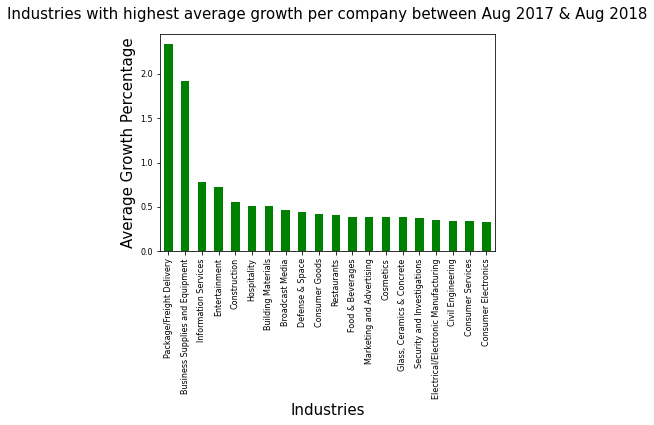

In [73]:
x1.plot.bar(legend=None, color='green',linewidth=width)
plt.xlabel('Industries', fontsize=15)
plt.ylabel('Average Growth Percentage', fontsize=15)
plt.title("Industries with highest average growth per company between Aug 2017 & Aug 2018", fontsize=15, y=1.04)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

Also, we can plot the industry for the 20 companies with highest growth.

In [71]:
x2 = (df_sorted_20.groupby('industry_x').company_name.nunique())
x2 = pd.DataFrame(x2)
x2.columns = ['number of company']
x2 = x2.sort_values('number of company', ascending=[False])
print(x2)

                                     number of company
industry_x                                            
Financial Services                                   3
Business Supplies and Equipment                      2
Construction                                         2
Restaurants                                          2
Aviation & Aerospace                                 1
Banking                                              1
Biotechnology                                        1
Building Materials                                   1
Electrical/Electronic Manufacturing                  1
Entertainment                                        1
Food & Beverages                                     1
Hospital & Health Care                               1
Information Services                                 1
Internet                                             1
Marketing and Advertising                            1


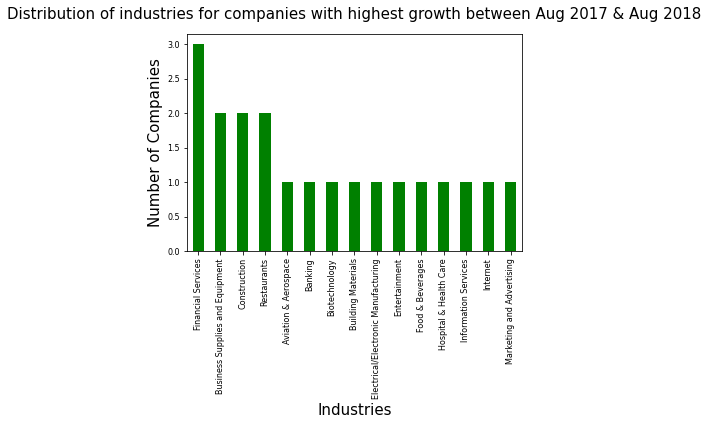

In [72]:
x2.plot.bar(legend=None, color='green',linewidth=width)
plt.xlabel('Industries', fontsize=15)
plt.ylabel('Number of Companies', fontsize=15)
plt.title("Distribution of industries for companies with highest growth between Aug 2017 & Aug 2018", fontsize=15, y=1.04)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In order to get some insights from both LinkedIn & Facebook data sets, I chose to work on the 3rd company with the highest growth which wa U-Haul. Starting with the LinkedIn data set:

# Create a machine learning model to predict companies' growth
The first step is feature engineering where we create appropreate features

In [74]:
df_linkedin_begin_end_clean.columns
df_linkedin_begin_end.shape

(3251, 22)

Encoding two of the features: description & website

In [75]:
#encoding description
df_linkedin_begin_end_clean['description_enc'] = 0
df_linkedin_begin_end_clean.loc[(df_linkedin_begin_end_clean['description_x']=='unknown') & (df_linkedin_begin_end_clean['description_y']=='unknown'),'description_enc'] =0
df_linkedin_begin_end_clean.loc[(df_linkedin_begin_end_clean['description_x']!='unknown') | (df_linkedin_begin_end_clean['description_y']!='unknown'),'description_enc'] =1
df_linkedin_begin_end_clean['description_enc'].nunique()
df_linkedin_begin_end_clean.groupby('description_enc').count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,dataset_id_x,as_of_date_x,company_name,followers_count_x,employees_on_platform_x,link_x,industry_x,date_added_x,date_updated_x,description_x,website_x,dataset_id_y,as_of_date_y,followers_count_y,employees_on_platform_y,link_y,industry_y,date_added_y,date_updated_y,description_y,website_y,growth_perc
description_enc,,,,,,,,,,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
1,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211,3211


In [76]:
#encoding website
df_linkedin_begin_end_clean['website_enc'] = 0
df_linkedin_begin_end_clean.loc[(df_linkedin_begin_end_clean['website_x']=='unknown') & (df_linkedin_begin_end_clean['website_y']=='unknown'),'website_enc'] =0
df_linkedin_begin_end_clean.loc[(df_linkedin_begin_end_clean['website_x']!='unknown') | (df_linkedin_begin_end_clean['website_y']!='unknown'),'website_enc'] =1
df_linkedin_begin_end_clean['website_enc'].nunique()
df_linkedin_begin_end_clean.groupby('website_enc').count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,dataset_id_x,as_of_date_x,company_name,followers_count_x,employees_on_platform_x,link_x,industry_x,date_added_x,date_updated_x,description_x,website_x,dataset_id_y,as_of_date_y,followers_count_y,employees_on_platform_y,link_y,industry_y,date_added_y,date_updated_y,description_y,website_y,growth_perc,description_enc
website_enc,,,,,,,,,,,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218


Categorizing Industry column by using label encoder:

In [77]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_linkedin_begin_end_clean['industry_enc'] = label_encoder.fit_transform(df_linkedin_begin_end_clean['industry_x'])
df_linkedin_begin_end_clean['industry_enc'].nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


111

Getting the percentage of number of followers

In [78]:
df_linkedin_begin_end_clean['follower_perc'] = (df_linkedin_begin_end_clean['followers_count_y']-df_linkedin_begin_end_clean['followers_count_x'])/df_linkedin_begin_end_clean['followers_count_x']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Categorizing output:

A binary categorization is used for this section. Growth percentage is devided into two categories of fast grow and slow grow companies based on the growth percentage below and above the mean growth percentage.

In [79]:
#categorizing output for prediction
df_linkedin_begin_end_clean['output_cat'] = 0
df_linkedin_begin_end_clean.loc[(df_linkedin_begin_end_clean['growth_perc']>=0.12),'output_cat'] =1
df_linkedin_begin_end_clean['output_cat'].nunique()
df_linkedin_begin_end_clean.groupby('output_cat').count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,dataset_id_x,as_of_date_x,company_name,followers_count_x,employees_on_platform_x,link_x,industry_x,date_added_x,date_updated_x,description_x,website_x,dataset_id_y,as_of_date_y,followers_count_y,employees_on_platform_y,link_y,industry_y,date_added_y,date_updated_y,description_y,website_y,growth_perc,description_enc,website_enc,industry_enc,follower_perc
output_cat,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614
1,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613


Running random forest for the chosen features:

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

y = df_linkedin_begin_end_clean.output_cat
features = ['follower_perc','industry_enc', 'website_enc', 'description_enc']
X = df_linkedin_begin_end_clean[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

model = RandomForestClassifier()
model.fit(X_train, y_train) 

#training accuracy
y_pred = model.predict(X_train)
print(accuracy_score(y_train, y_pred))

#testing accuracy
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9996125532739248
0.5727554179566563


Running Decision tree for the chosen features:

In [81]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train) 

#training accuracy
y_pred1 = model1.predict(X_train)
print(accuracy_score(y_train, y_pred1))

#testing accuracy
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.9996125532739248
0.5464396284829721


Overfitting is observed. Therefore, pruning the trees by giving the maximum depth of the trees is performed:

In [84]:
model1 = DecisionTreeClassifier(max_depth=5)
model1.fit(X_train, y_train) 

#training accuracy
y_pred1 = model1.predict(X_train)
print(accuracy_score(y_train, y_pred1))

#testing accuracy
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(recall_score(y_test, y_pred1))

0.6667958155753584
0.6160990712074303
0.608355091383812
0.7039274924471299


A random forest model is built and used here:

In [82]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train) 

#training accuracy
y_pred = model.predict(X_train)
print(accuracy_score(y_train, y_pred))

#testing accuracy
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.6834560247965905
0.628482972136223
0.6260387811634349
0.6827794561933535


Random Forest seems to work slightly better than decision tree.

Checking feature importance:

In [83]:
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
print(feature_importances)

[('follower_perc', 0.87), ('industry_enc', 0.13), ('website_enc', 0.0), ('description_enc', 0.0)]
